<a href="https://colab.research.google.com/github/Rajaanthonysamy/PyTorch/blob/main/02_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow end-to-end

In [80]:
import torch
from torch import nn ## nn contains all workflow of the pytorch building block neural network

In [81]:
import matplotlib.pyplot as plt

In [82]:
torch.__version__

'2.8.0+cu126'

Data Preparing and loading

data can be anything in machine learning


In [83]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias



## SPlit data train test

In [84]:
X.size()

torch.Size([50, 1])

In [85]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [86]:
train_split

40

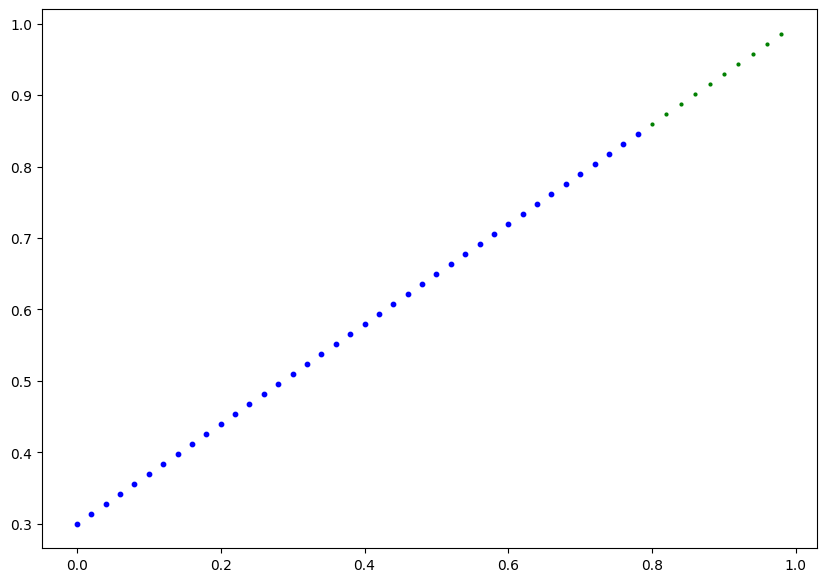

In [87]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", s=10, label="training data")
plt.scatter(X_test, y_test, c="g", s=4, label="testing data")

In [88]:
def plot_prediction(train_data= X_train , train_labels=y_train , test_data=X_test , test_labels=y_test , predictions=None):
  """Plots training data , test data and compares predictions"""
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size":14})

In [89]:
pred=torch.rand(10,1)

In [90]:
pred.size()

torch.Size([10, 1])

In [91]:
pred

tensor([[0.6009],
        [0.2566],
        [0.7936],
        [0.9408],
        [0.1332],
        [0.9346],
        [0.5936],
        [0.8694],
        [0.5677],
        [0.7411]])

In [92]:
X_test.size()

torch.Size([10, 1])

In [93]:
pred.size()

torch.Size([10, 1])

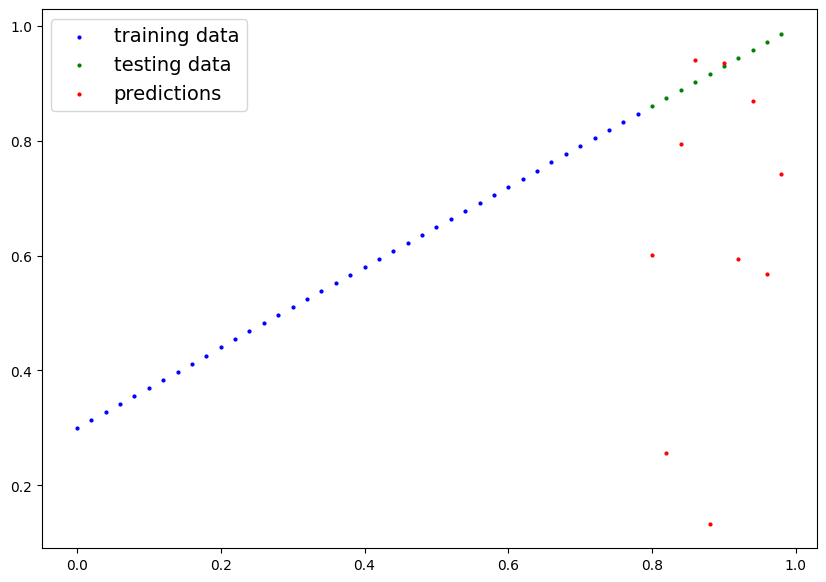

In [94]:
plot_prediction(predictions=pred)

In [95]:
pred= torch.arange(0,1,0.1)

In [96]:
pred

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])

In [97]:
pred=pred * weight + bias

In [98]:
pred

tensor([0.3000, 0.3700, 0.4400, 0.5100, 0.5800, 0.6500, 0.7200, 0.7900, 0.8600,
        0.9300])

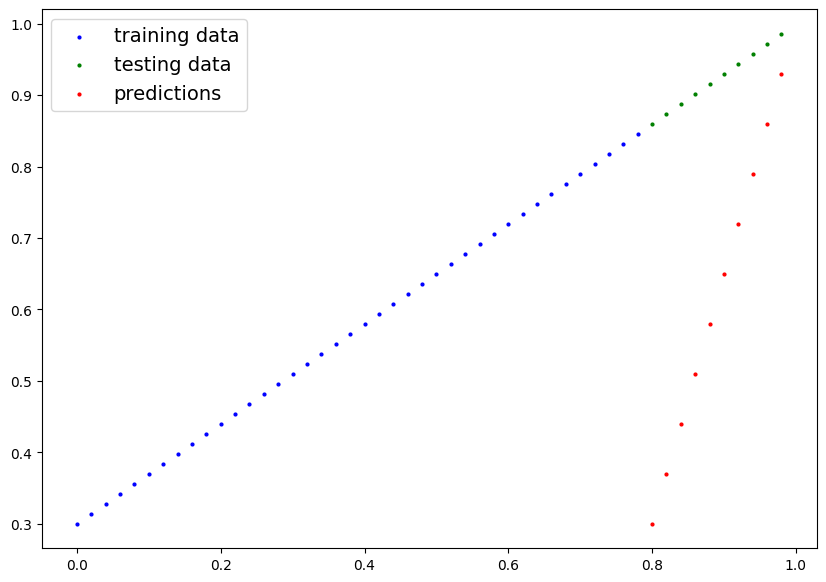

In [99]:
plot_prediction(predictions=pred)

## Build Linear model

In [100]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(
        1,requires_grad=True, dtype=torch.float
    ))
    self.bias= nn.Parameter(torch.rand(
        1,  requires_grad=True, dtype=torch.float
    ))

### forward method define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor:   ### have to override the model when use subclass nn.module
    return self.weights * x + self.bias

# Pytorch model building essentials

torch.nn - computational graaph for model building (a neural network can be considered as a computational graph)

torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set for us

torch.nn.Module - Base class for the all neural network module, we should overide the forward method

torch.optim - this is where the optimizers in pytorch live , they will help with gradient descent

def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation


--------------------------------------------------------------------


PyTorch module	What does it do?
torch.nn	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

torch.nn.Parameter	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

torch.nn.Module	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

torch.optim	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).


def forward()	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).

In [101]:
torch.manual_seed(42)

model_0 = LinearModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [102]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [103]:
weight,bias

(0.7, 0.3)

In [104]:
### making prediction usingh torch.inference_mode()

## to chk our model predictive power lets see how well it predicts y_test based on X_test

## when we pass data throgh our model, its going to run it through the forward() method



In [105]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [106]:
y_preds_without_with = model_0(X_test)
y_preds_without_with #### when we didnt use with bloack that time it will track the gradient so it will make the computation slower
#### when model training is happening that time use the with block to track the gradient
## when its prediction mode that time use the with block for computation speed thetime it wont calculate the  gradient tracking

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]], grad_fn=<AddBackward0>)

In [107]:
y_preds

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [108]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

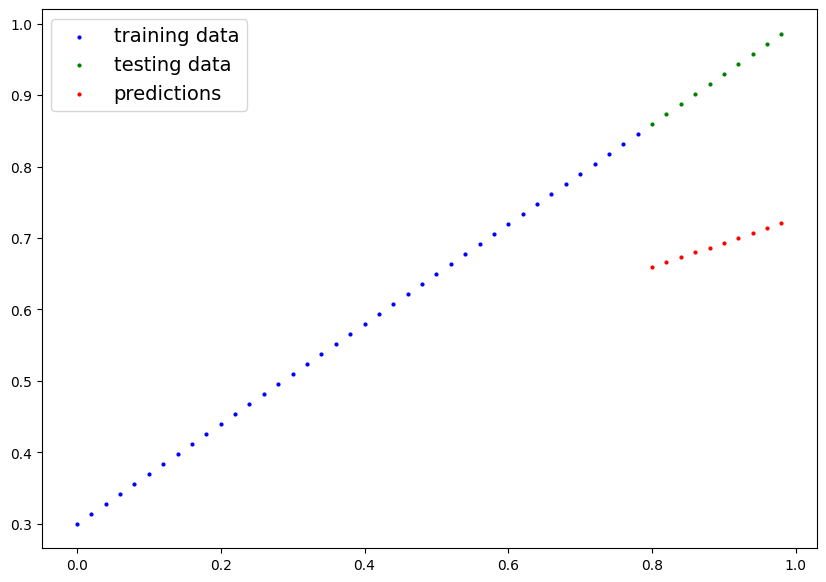

In [109]:
plot_prediction(predictions=y_preds)

In [110]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [111]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

** Loss Function

A function to measure how wrong your models prediction are to ideal outputs, lower is better.

** Optimizers

Takes into account the loss of the model and adjusts the model's parameters(weights and bias) to improve the loss

In [112]:
loss_func = nn.L1Loss()


opti= torch.optim.SGD(params=model_0.parameters(), lr=0.01)



** Building a training loop and a testing loop in pytorch

**Couple of things we need in a training loop

0. loop through the data

1. forward pass this involves data moving through our models forward() function also called forward propgation

2. calculate the loss (compare forward pass prediction ground thruth labels)

3. Optimizer zero grad

4. loss backward - move throgh the backward to network to calculate the gradients of each of the parameters of our models with respect to the loss

5. Optimizer step - use the optimizer to adjust the models paramaeter to try and improve the loss

In [148]:
## an epochs is one loop through the data (this is a hyperparameter because we are set it ourselves)
epochs=1000
torch.manual_seed(42)

for epoch in range(epochs):
  print("epochs")
  ## setting the model to the training mode
  model_0.train()

  ## 1.forward pass
  y_pred = model_0(X_train)

  ## 2. calculate loss function
  loss = loss_func(y_pred,y_train)

  print("Loss ",loss)

  ## 3 .optimizer zero grad
  opti.zero_grad()

  ## 4. perform back propagation

  loss.backward()
  ## 5. step the optimizer performm the gradient descent
  opti.step()## by default optimizer changes will accumilate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ## testing
  model_0.eval() ## turn off the gradient
  print(model_0.state_dict())

epochs
Loss  tensor(0.0066, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})
epochs
Loss  tensor(0.0050, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6923]), 'bias': tensor([0.2964])})
epochs
Loss  tensor(0.0066, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})
epochs
Loss  tensor(0.0050, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6923]), 'bias': tensor([0.2964])})
epochs
Loss  tensor(0.0066, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})
epochs
Loss  tensor(0.0050, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6923]), 'bias': tensor([0.2964])})
epochs
Loss  tensor(0.0066, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6962]), 'bias': tensor([0.3064])})
epochs
Loss  tensor(0.0050, grad_fn=<MeanBackward0>)
OrderedDict({'weights': tensor([0.6923]), 'bias': tensor([0.2964])})
epochs
Loss  tensor(0.00

refer : https://www.learnpytorch.io/01_pytorch_workflow/

In [124]:

model_0.state_dict()

OrderedDict([('weights', tensor([0.3720])), ('bias', tensor([0.4174]))])

In [149]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

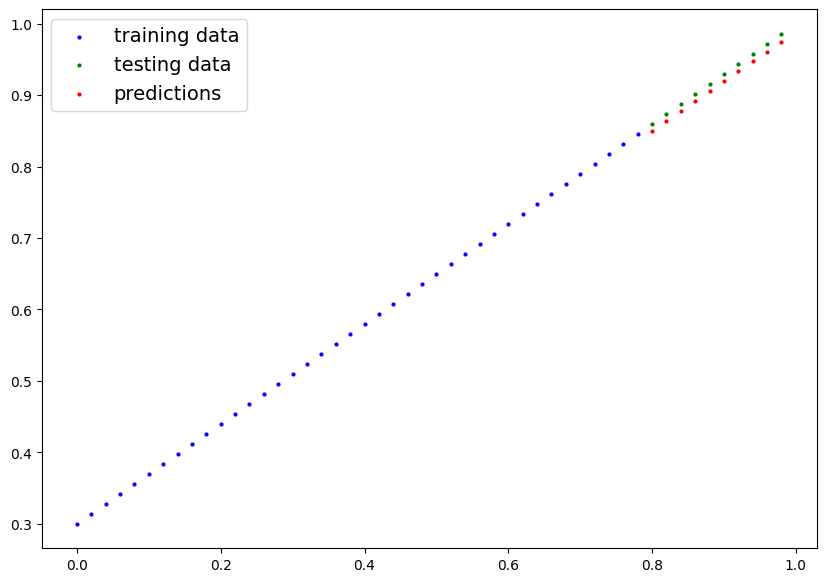

In [150]:
plot_prediction(predictions=y_preds_new)